In [1]:
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from functools import partial

# Tarea Unidad 3 - Aprendizaje Supervisado

Fecha de entrega: **Viernes 11 de Junio de 2021 a las 23:59**.

- Consultas por slack o al correo felipe dot quezada at uach dot cl
- 4 integrantes como maximo.

Integrantes:
- Edgar Alarcón
- Jonathan Gonzalez
- Mónica Higuera
- Carlos Leyán

La tarea consiste en resolver 2 problemas utilizando los contenidos vistos hasta ahora. En la carpetas `2/` se encuentran el dataset para el segundo problema. Para el primero problema, existe un link a un archivo compartido en google drive, que se encuentra mas abajo.

# 1: Clasificacion de Asteroides

**ALERTA! IMPACTO DE ASTEROIDE!** La nueva base espacial de Pluton esta constatemente bajo ataque de asteroides provenientes de un agujero blanco cercano. No son asteroides muy grandes, pero si han causado importantes danos en la infraestructura. Por esta razon, la Union Intergalactica Terrestre le ha pedido a usted, como experto en aprendizaje supervisado, hacerse cargo del problema. La base cuenta con equipamiento especial para detectar y pulverizar a los asteroides, sin embargo, como los recursos son limitados, se debe usar correctamente. Las caracteristicas del asteroide se pueden calcular al instante con instrumentos especializados, solo hace falta alguna manera de poder utilizar esa informacion y predecir cuando son peligrosos y cuando no.

Para lograr la tarea, se ha puesto a su dispocision un listado de asteroides con sus caracteristicas y su etiqueta. El dataset esta compuesto por los siguientes campos:

- name: Nombre del asteroide
- a: Eje semi-mayor (grad)
- e: excentricidad (km)
- i: Inclinacion con respecto al plano eliptico x-y (grados)
- om: Longitud en el nodo ascendente (km)
- w: Valor de Perihelio (km)
- q: Distancia de Perihelio (km)
- ad: Distancia de Afelio (km)
- per_y: Periodo orbital (años)
- data_arc: Usado para cruzar info.
- condition_code: condicion del asteroide. De peor a mejor: 0, 1, 2, 3, 4, 5, 6, 7, D, E
- n_obs_used: numero de mediciones
- H: parametro de Magnitud Absoluta
- pha: VARIABLE OBJETIVO, pregunta, el asteroide presenta un peligro? N o Y
- diameter: Diametro (km)
- extent: extencion (km x km x km)
- albedo: porcentje de radiacion reflejada (Bq)
- rot_per: velocidad rotacion (m/s)
- GM: Masa global (m)
- BV: Volumen (m3)
- UB: Cantidad de Ultravioleta reflejada (Bq)
- IR: Cantidad de IR reflejados (Bq)
- G: Gravedad esperada (m/s2)
- moid: ID interno para cruzar datos
- class: Tipo de asteroide, 0, 1, 2, 3, 4, 5, 6, 7
- n: Rotacion (grados/dias)
- per: Periodo orbital (dias)
- ma: Anomalia media en grados.

**Objetivo Principal**
- Entrenar un Regresor Logistico capaz de predecir si el asteroide es peligroso o no.

El dataset se encuentra en: 

https://drive.google.com/file/d/1g_7HvzXQCtZ57X3inevTE4mQ49gZU6FW/view?usp=sharing


Para esto debe utilizar todos los contenidos vistos en la unidad. Esto incluye, pero no se limita a limpiar, preprocesar y segregar el dataset, entrenar y evaluar el modelo, etc... Cada decision que pueda ser considerada importante debe ser justificada, es decir, debe explicar por que no esta haciendo las cosas de otra manera. Recuerde, analize correctamente los datos, y sea consciente de lo que este haciendo su codigo para evitar errores *paranormales*. Finalmente debe terminar con un resumen de los principales desafios y resultados, comentando los resultados en funcion de las metricas vistas en clase. Para el Accuracy, comentar por que cree que obtuvo ese resultado.


#### Respuesta 1:
### Etapa previa : Analisis y preprocesamiento de los datos

In [2]:
import pandas as pd
df_data = pd.read_csv("data/asteroides.csv", sep=";")

C:\Users\Jonathan Gonzalez\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,10,15,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df_data
df

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,GM,BV,UB,IR,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,62.6284,0.713,0.426,NaN,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,14.3,0.635,0.284,NaN,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,NaN,0.824,0.433,NaN,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,17.8,0.782,0.492,NaN,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,NaN,0.826,0.411,NaN,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


En primer lugar eliminamos la columna 'name' ya que no nos interesa saber el nombre de los asteroides .Luego analizamos los datos que son de tipo "NaN" para sacarlos de nuestra database.

In [99]:
df.drop(['name'],axis=1,inplace=True)
df.isnull().sum(axis=0)

a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [4]:
df

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,GM,BV,UB,IR,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,62.6284,0.713,0.426,NaN,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,14.3,0.635,0.284,NaN,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,NaN,0.824,0.433,NaN,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,17.8,0.782,0.492,NaN,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,NaN,0.826,0.411,NaN,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


La tabla anterior muestra la cantidad de datos con valor "NaN" que posee nuestro dataframe, a primera vista no es una buena idea simplemente eliminar las columnas de datos que tengan NaN dado la diferencia en la cantidad de este tipo de datos entre las columnas, por lo que en primer lugar eliminaremos las columnas que tengan altos valores con "NaN", estas son :**{'extent','diameter','albedo','rot_per','GM','BV','UB','IR','G'}**, luego dropeamos de las filas que quedan todas las que tengan uno o más  "Nan" en sus columnas.

In [5]:
df.drop(['extent','diameter','albedo','rot_per','GM','BV','UB','IR','G'],axis=1,inplace=True)
df.dropna(inplace=True)
df.isnull().sum(axis=0)

name              0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
pha               0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

Nos quedan entonces solo valores distintos de "Nan" en nuestro dataframe.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820167 entries, 0 to 839713
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               820167 non-null  float64
 1   e               820167 non-null  float64
 2   i               820167 non-null  float64
 3   om              820167 non-null  float64
 4   w               820167 non-null  float64
 5   q               820167 non-null  float64
 6   ad              820167 non-null  float64
 7   per_y           820167 non-null  float64
 8   data_arc        820167 non-null  float64
 9   condition_code  820167 non-null  object 
 10  n_obs_used      820167 non-null  int64  
 11  H               820167 non-null  float64
 12  pha             820167 non-null  object 
 13  moid            820167 non-null  float64
 14  class           820167 non-null  object 
 15  n               820167 non-null  float64
 16  per             820167 non-null  float64
 17  ma        

Para poder trabajar nuestros datos es necesario que todos sean valor valores númericos (enteros o flotantes),en este caso
tenemos datos que son del tipo _object_ que son el **condition code**,**class** y **pha**(aunque este último son las soluciones de nuestro sistema),por lo que será necesario modificarlos.
- Condition code: De peor a mejor: 0, 1, 2, 3, 4, 5, 6, 7, D, E, esto indica que es una escala ordinal, por lo que es posible simplemente sustituir los valores de D y E por 8 y 9.
- Class: Clases de asteroides : MBA,OMB,IMB,MCA,APO,AMO,TJN,TNO,ATE,CEN,AST,IEO, es una escala nominal sin relacion entre sus datos,por lo que utilizaremos el método de codificación One Hot. (ref: https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-ordinal-one-hot/)

In [90]:
df['class'].value_counts()

MBA    730093
OMB     23786
IMB     17211
MCA     16728
APO     11598
AMO      7996
TJN      7303
TNO      3291
ATE      1585
CEN       479
AST        77
IEO        20
Name: class, dtype: int64

In [119]:
df['condition_code'] = df['condition_code'].replace('D', 8)
df['condition_code'] = df['condition_code'].replace('E', 9)
df

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,pha,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,N,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,N,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,N,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,N,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,N,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,0.032397,APO,0.208911,1723.217927,156.905910
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,0.956145,MBA,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,0.893896,MBA,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,0.680220,MBA,0.290018,1241.302609,15.320134


In [120]:
#sustitucion de letras por valores en condition code

#One-Hot encoding para el atributo class
dummies = pd.get_dummies(df['class'], drop_first = True)
df3 = pd.concat([df, dummies], axis = 1)
# Eliminamos la vairable original race
df3 = df.drop(columns=['class'],inplace=True)
df3


In [116]:
df2 = df.drop(columns=['pha','condition_code','class'])

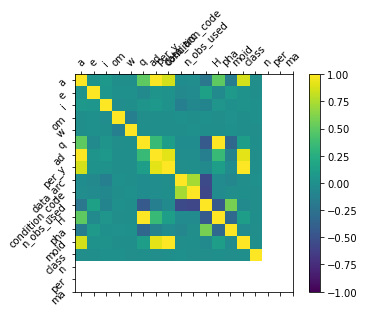

In [104]:
import matplotlib.cm as cm
fig, ax = plt.subplots(tight_layout=False)
f = ax.matshow(df.corr(), vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))

ax.set_xticklabels(df.columns,rotation=45)
ax.set_yticklabels(df.columns,rotation=45)


fig.colorbar(f, ax=ax);

In [ ]:
#podriamos eliminar algunas variables que se encuentren muy correlacionadas

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(df2[df2.columns])
pca.explained_variance_ratio_

array([0.99743729, 0.00254862])

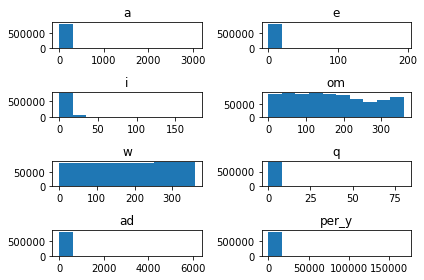

In [111]:
fig, ax = plt.subplots(4, 2, tight_layout=True)

for i in range(4):
    for j in range(2):
        ax[i,j].hist(df[df.columns[i*2+j]])
        ax[i,j].title.set_text(df.columns[i*2+j])

In [157]:
df_y['pha'].value_counts()

N    818154
Y      2013
Name: pha, dtype: int64

# 2: Hallando la respuesta de la vida

Un grupo de arqueologos ha logrado encontrar la ultima pieza de una antigua tablilla sumeria con la respuesta de la vida, y necesitan de tu ayuda para descifrar sus secretos. Normalmente, las tablillan muestran una onda tal que al ser reproducidas en un altavoz, resuenan con otro artefacto sumerio a una cierta frecuencia. Esta frecuencia despues es traducida en una palabra utilizando un diccionario especial. Desafortunadamente, la ultima onda presenta perdida de informacion y ruido, debido al transcurso de los años. 

Hasta ahora solo han podido descifrar "La Respuesta de la Vida esta en ______".

Su mision es tomar la poca informacion que se tiene de la onda y tratar de descifrar la señal original.

**Objetivo Principal**
- Entrenar un Regresor Lineal para estimar la señal original.

Se espera que el error de reconstruccion sea el menor posible. Para esto, puede medir el error promedio de las predicciones de su modelo utilizando una metrica como el Error Medio Cuadratico.

$$\frac{1}{N}\sum_{i=0}^N(y_i - \hat y_i)^2$$

donde $y_i$ es la etiqueta, $\hat y_i$ es la prediccion de su modelo y $N$ el numero de observaciones. Se recomienda analizar la informacion que se tiene para hacer predicciones mas precisas.

**El entregable** sera este mismo notebook modificado con todo el procedimiento y los comentarios. Enviar al correo indicado al inicio del documento.
Se evaluara el procedimiento y la calidad de las justificaciones, ademas de los resultados obtenidos.

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import Audio
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout)

In [2]:
df1 = pd.read_csv("2/X.csv", sep=";", names=['x'])
df2 = pd.read_csv("2/y.csv", sep=";", names=['y'])
merged = df1.join(df2)
display(merged)
pd.set_option('display.max_rows', 10)

,x,y
0,3.838839,70.644376
1,-9.668669,14.811297
2,12.401401,148.384598
3,0.533534,78.042929
4,8.809810,-23.509380
...,...,...
125,-10.241241,26.044270
126,-5.972973,21.009229
127,9.382382,-4.997534
128,-1.678679,24.292645


<IPython.core.display.Javascript object>


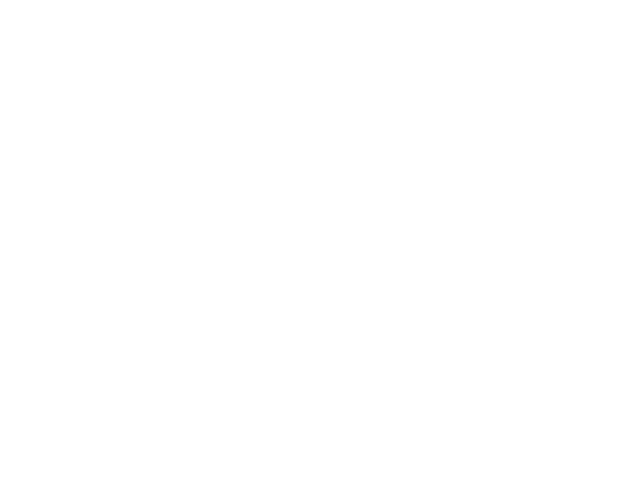

<AxesSubplot:>

In [3]:
merged.plot()

- Para este caso utilizamos un regresor lineal polinomial en vez de uno simple, ya que al ver el comportamiento de los puntos en la gráfica scatter, vemos que estos no presentan una tendencia lineal.

In [4]:
from sklearn.model_selection import train_test_split

X = df1
y = df2
X_train, X_test, y_train, y_test = train_test_split(X, y)

<IPython.core.display.Javascript object>


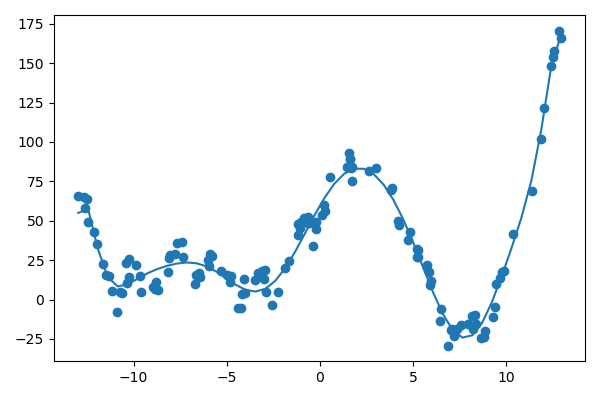

interactive(children=(IntSlider(value=1, description='G: grado del polinomio', layout=Layout(height='20px', wi…

In [7]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

regr = linear_model.Ridge(alpha=.5)
model = make_pipeline(PolynomialFeatures(2), regr)
def update_plot(ax, M, L):
    ax.cla()
    regr = linear_model.Ridge(alpha=L)
    model = make_pipeline(PolynomialFeatures(M), regr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    x_plot = np.linspace(X.min(), X.max())
    ax.scatter(X, y)
    y_plot = model.predict(x_plot)
    ax.plot(x_plot, y_plot)
    plt.show()
    print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
    
widgets.interact(update_plot, 
                 ax=widgets.fixed(ax), 
                 M=IntSlider_nice(description='G: grado del polinomio', min=1, max=20),
                 L=FloatSlider_nice(description='Lambda: Regularizacion', min=0, max=3, step=0.01));


- Los valores que optamos a tomar son, para el grado del polinomio, en primera instancia, estábamos entre grado 7 y el de grado 15, pero luego descartamos en base al error medio cuadrático, que en este caso era de menor valor en el polinomio de grado 15. Luego, al proceder para sacar el lambda también nos fijamos según el error medio cuadrático, en el valor 0.01 era el menor, si íbamos aumentando el valor de lambda, el error aumentaba con él.

C:\Users\razor\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13312e-36): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


<IPython.core.display.Javascript object>


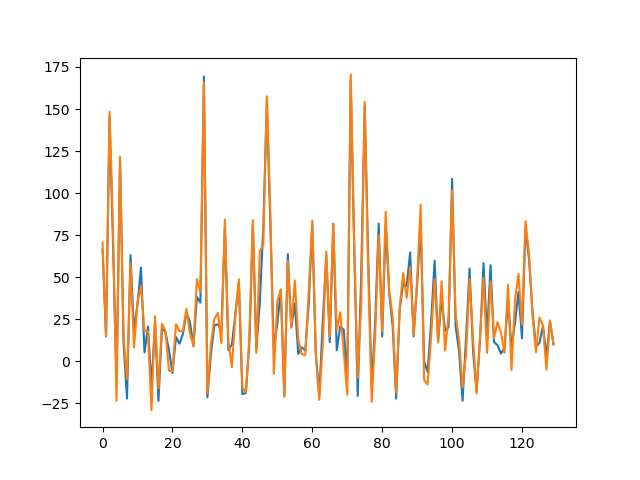

In [6]:
regr = linear_model.Ridge(alpha=0.01)
model = make_pipeline(PolynomialFeatures(15), regr)
model.fit(X_train, y_train)
y_pred = model.predict(X)
plt.close('all');
plt.plot(y_pred)
plt.plot(y)

También nos guiamos para la elección de datos al ver el gráfico original vs la reconstrucción hecha en base a nuestro regresor lineal, éste según nuestro G = 15 y lambda = 0.01, armaba una reconstrucción bastante similar a lo que era nuestro gráfico inicial.